In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('sfari.csv')

In [6]:
data.columns

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')

In [24]:
gene_score_counts = data['gene-score'].value_counts()
gene_score_counts = np.append(gene_score_counts.values, 84)
gene_score_counts

array([507, 207, 194,  84], dtype=int64)

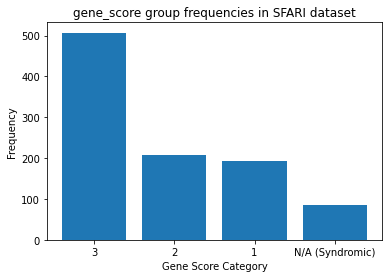

In [43]:
plt.figure()
plt.bar(['3','2','1','N/A (Syndromic)'], gene_score_counts)
plt.title("gene_score group frequencies in SFARI dataset")
plt.xlabel("Gene Score Category")
plt.ylabel("Frequency")
plt.savefig("imgs/1-1.pdf")

In [42]:
data_ranked = data.sort_values('number-of-reports', ascending=False)
is_1 = data_ranked['gene-score']==1.0
data_ranked_gs1 = data_ranked[is_1]
top_gs1_genes = data_ranked_gs1['gene-symbol'].head(5).values
top_gs1_genes

array(['SHANK3', 'NRXN1', 'MECP2', 'SCN2A', 'SCN1A'], dtype=object)

In [97]:
gs1_gene_reports = np.array([360, 162, 497, 73, 59])
gs1_mesh_reports = np.array([136, 46, 95, 29, 14])

In [109]:
table = pd.DataFrame()
#Load the publication year counts into a table
for gene in top_gs1_genes:
    pub_data = pd.read_csv(("data/"+gene+".csv"))['Publication Year'].value_counts()
    pub_data.name = gene
    table = table.append(pub_data, sort=False)
#Fill all NaN's with 0's
table = table.fillna(0)
#Re-sort the columns
cols = np.array(table.columns.tolist())
cols = np.sort(cols)
table = table[cols]
table

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
SHANK3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,8.0,...,9.0,4.0,5.0,1.0,13.0,18.0,20.0,19.0,25.0,6.0
NRXN1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,...,1.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,9.0,0.0
MECP2,1.0,1.0,2.0,4.0,3.0,6.0,2.0,4.0,7.0,5.0,...,5.0,5.0,5.0,2.0,5.0,13.0,9.0,2.0,6.0,3.0
SCN2A,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,1.0,4.0,5.0,4.0,7.0,0.0
SCN1A,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0


In [106]:
sums = []
for i in table.index:
    sums.append(table.loc[i].sum())
sums
#Confirming that the sums are correct

[136.0, 46.0, 95.0, 29.0, 14.0]

In [107]:
sums == gs1_mesh_reports

array([ True,  True,  True,  True,  True])

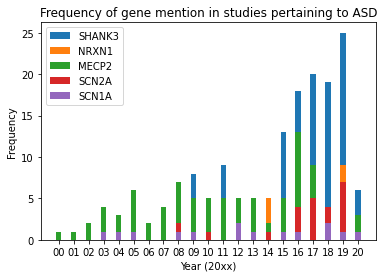

In [119]:
labels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
for i in table.index:
    ax.bar(labels, table.loc[i], width, label=i)


ax.set_ylabel('Frequency')
ax.set_xlabel('Year (20xx)')
ax.set_title('Frequency of gene mention in studies pertaining to ASD')
ax.legend()

plt.show()
fig.savefig('imgs/pub_histo.pdf')

In [118]:
table

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
SHANK3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,8.0,...,9.0,4.0,5.0,1.0,13.0,18.0,20.0,19.0,25.0,6.0
NRXN1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,...,1.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,9.0,0.0
MECP2,1.0,1.0,2.0,4.0,3.0,6.0,2.0,4.0,7.0,5.0,...,5.0,5.0,5.0,2.0,5.0,13.0,9.0,2.0,6.0,3.0
SCN2A,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,1.0,4.0,5.0,4.0,7.0,0.0
SCN1A,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0
